# Importation des données

In [11]:
def extended_score(y_pred, y_reel):
    n = len(y_pred)
    c = 0
    for i in range(n):
        if(abs(y_pred[i] - y_reel[i]) <= 1) : 
            c += 1
    return c/n

In [1]:
import pandas as pd

data = pd.read_csv("train.csv")
data

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,A8,26,0.230769,2,3,1,0.492537,0.563636,0.225941,...,0,0,0,0,0,0,0,0,0,7
1,1,D2,26,1.000000,3,3,1,0.671642,0.781818,0.326360,...,0,0,0,0,0,0,0,0,0,6
2,1,D2,26,0.230769,2,3,1,0.626866,0.745455,0.393305,...,0,0,0,0,0,0,0,0,0,1
3,1,D4,26,0.230769,2,3,1,0.268657,0.690909,0.246862,...,0,0,0,0,0,0,0,0,0,4
4,1,E1,10,0.230769,2,3,1,0.641791,0.581818,0.466527,...,0,0,1,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58876,1,A1,26,0.051282,2,3,1,0.507463,0.781818,0.518828,...,0,0,1,0,0,0,0,0,1,2
58877,1,A1,26,0.128205,2,3,1,0.223881,0.709091,0.223849,...,0,0,0,0,0,0,0,0,0,8
58878,1,D3,26,0.076923,2,3,1,0.611940,0.745455,0.309623,...,0,0,0,1,0,0,0,0,0,8
58879,1,D3,26,1.000000,2,3,1,0.298507,0.690909,0.234310,...,0,0,0,0,0,0,0,0,0,8


# Labélisation

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from IPython.display import clear_output

npdata = data.to_numpy().copy()
npdata = np.delete(npdata, -1, 1)

labEncoder = LabelEncoder(); 

all_label = npdata.reshape(1, -1)[0]
labEncoder.fit(all_label.astype(str))

LabelEncoder()

In [4]:
for i in range(len(npdata)):
    if(i%500 == 0):
        clear_output()
        print(str(i)+'/'+str(len(npdata)))
    npdata[i] = labEncoder.transform(npdata[i].astype(str))

clear_output()
print(str(len(npdata))+'/'+str(len(npdata)))
npdata

58881/58881


array([[10152, 11311, 10539, ..., 0, 0, 0],
       [10152, 11326, 10539, ..., 0, 0, 0],
       [10152, 11326, 10539, ..., 0, 0, 0],
       ...,
       [10152, 11327, 10539, ..., 0, 0, 0],
       [10152, 11327, 10539, ..., 0, 0, 0],
       [10152, 11328, 10539, ..., 0, 0, 0]], dtype=object)

# Apprentissage

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(npdata, data['Response'].to_numpy())
y_test.shape

(14721,)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_standard.fit(npdata)

X_scaled_train = scaler_standard.transform(X_train)
X_scaled_test = scaler_standard.transform(X_test)

## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn100 = KNeighborsClassifier(n_neighbors=60)

In [14]:
acc = []
n_val = [50,60,70]

for i in n_val:
    clear_output()
    print(str(i))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_scaled_train, y_train)
    acc.append(knn.score(X_scaled_test, y_test))
clear_output()
print('Done')

Done


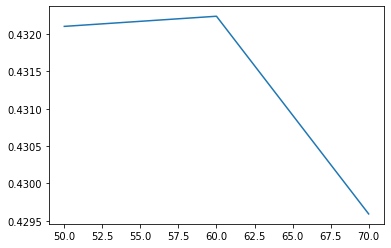

In [15]:
import matplotlib.pyplot as plt
plt.plot(n_val, acc)

In [17]:
acc = []
n_tot = 20

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    knn100.fit(X_pca_train, y_train)
    acc.append(knn100.score(X_pca_test, y_test))
clear_output()
print(str(n_tot)+'/'+str(n_tot))

20/20


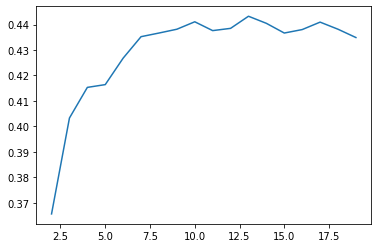

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(2, n_tot), acc)

In [19]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.4432443448135317 (11)


In [32]:
pca = PCA(n_components=10)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
knn100.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform')

In [33]:
print('Score train: %f'%knn100.score(X_pca_train, y_train))
print('Score test: %f'%knn100.score(X_pca_test, y_test))
print("Extended accuracy:", extended_score(knn100.predict(X_pca_test), y_test))

Score train: 0.454167
Score test: 0.426466
Extended accuracy: 0.6223761972692072


## SVM

In [27]:
from sklearn.svm import SVC

svm10 = SVC(kernel="linear", C=1.0)

In [23]:
acc = []

n_tot = data.shape[1]

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    svm10.fit(X_pca_train, y_train)
    acc.append(svm10.score(X_pca_test, y_test))
    
clear_output()
print(str(n_tot)+'/'+str(n_tot))

78/129
acc: 0.48726309353984104


KeyboardInterrupt: 

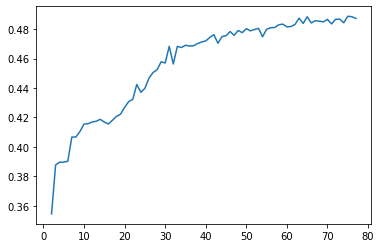

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(2, len(acc)+2), acc)

In [27]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.4887575572311664 (73)


In [28]:
pca = PCA(n_components=17)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
svm10.fit(X_pca_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
print('Score train: %f'%svm10.score(X_pca_train, y_train))
print('Score test: %f'%svm10.score(X_pca_test, y_test))
print("Extended accuracy:", extended_score(svm10.predict(X_pca_test), y_test))

Score train: 0.426925
Score test: 0.420759
Extended accuracy: 0.6274709598532708


## Linear Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logReg10 = LogisticRegression(C=1.0, solver = 'lbfgs')

In [15]:
acc = []

n_tot = data.shape[1]

for i in range(2,n_tot):
    clear_output()
    print(str(i)+'/'+str(n_tot))
    if(len(acc) != 0):
        print('acc: ' + str(acc[-1]))
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    X_pca_train = pca.transform(X_scaled_train)
    X_pca_test = pca.transform(X_scaled_test)
    logReg10.fit(X_pca_train, y_train)
    acc.append(logReg10.score(X_pca_test, y_test))
    
clear_output()
print(str(n_tot)+'/'+str(n_tot))

129/129


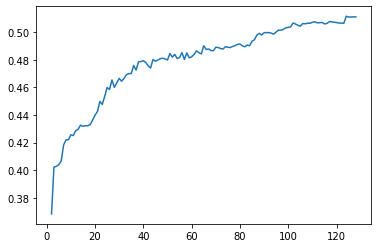

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(2, n_tot), acc)

In [17]:
print(str(max(acc)) + ' (' + str(acc.index(max(acc))) + ')') 

0.5115141634399837 (122)


In [23]:
pca = PCA(n_components=122)
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)
logReg10.fit(X_pca_train, y_train)

d:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print('Score train: %f'%logReg10.score(X_pca_train, y_train))
print('Score test: %f'%logReg10.score(X_pca_test, y_test))
print("Extended accuracy:", extended_score(logReg10.predict(X_pca_test), y_test))

Score train: 0.509307
Score test: 0.503091
Extended accuracy: 0.6879288091841587


# Neural Network

In [19]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(50,10),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6289402173913043
  Test  accuracy: 0.524624685822974
  Extended accuracy: 0.7250186807961415


In [20]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(30,20),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6062273550724637
  Test  accuracy: 0.5339990489776509
  Extended accuracy: 0.7239997282793289


In [18]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6763586956521739
  Test  accuracy: 0.5056721690102575
  Extended accuracy: 0.6990693567013111


In [17]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(50,10),
                        activation="logistic", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6635190217391305
  Test  accuracy: 0.49256164662726715
  Extended accuracy: 0.6949256164662727


In [16]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(50),
                        activation="logistic", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6372282608695652
  Test  accuracy: 0.5065552611914952
  Extended accuracy: 0.6998845187147612


In [15]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(50,50),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.664356884057971
  Test  accuracy: 0.503770124312207
  Extended accuracy: 0.7063378846545751


In [14]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(50,20),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6440896739130435
  Test  accuracy: 0.5212281774335983
  Extended accuracy: 0.71741050200394


In [34]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(20,10),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.5824954710144927
  Test  accuracy: 0.5439847836424156
  Extended accuracy: 0.7352761361320562


In [12]:
from sklearn.neural_network import MLPClassifier

network = MLPClassifier(hidden_layer_sizes=(30,10),
                        activation="relu", 
                        max_iter=5000)

network.fit(X_scaled_train, y_train)

print("ReLu activation")
print("  Train accuracy:", network.score(X_scaled_train, y_train))
print("  Test  accuracy:", network.score(X_scaled_test, y_test))
print("  Extended accuracy:", extended_score(network.predict(X_scaled_test), y_test))

ReLu activation
  Train accuracy: 0.6036911231884058
  Test  accuracy: 0.5397731132395897
  Extended accuracy: 0.7304530942191427


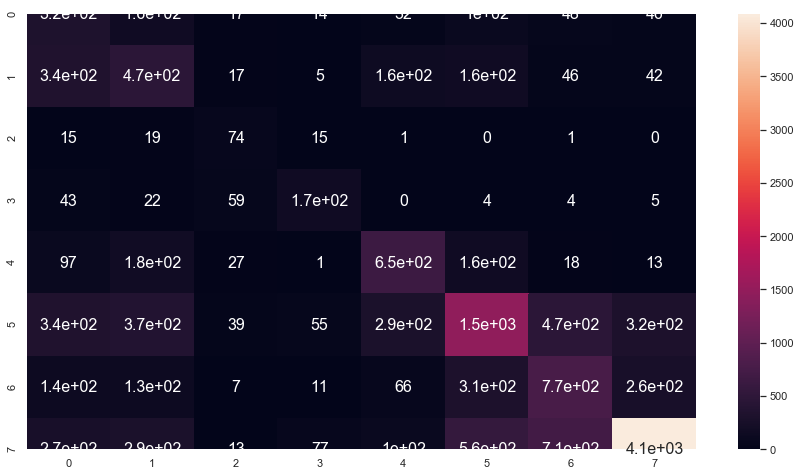

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

array = confusion_matrix(network.predict(X_scaled_test), y_test)

df_cm = pd.DataFrame(array, range(8), range(8))
plt.figure(figsize=(15,8))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Test du Khi-2 d'indépendence

## Genre

In [25]:
table_predict = network.predict(X_scaled_test)

In [26]:
table = pd.DataFrame()
series = pd.Series([0] * 8, index = range(1,9))
table['Male'] = series
table['Female'] = series
table['Sum'] = series

table.loc['Sum'] = [0, 0, 0]
table 

,Male,Female,Sum
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
Sum,0,0,0


In [27]:
for i in range(X_test.shape[0]):
    if(X_test[i][23] == 11330):
        table['Male'][table_predict[i]] += 1
        table['Male']['Sum'] += 1
    elif(X_test[i][23] == 11335):
        table['Female'][table_predict[i]] += 1
        table['Female']['Sum'] += 1
    table['Sum'][table_predict[i]] += 1
    table['Sum']['Sum'] += 1
table

,Male,Female,Sum
1,329,527,856
2,451,560,1011
3,61,75,136
4,127,178,305
5,549,599,1148
6,670,2411,3081
7,712,953,1665
8,3413,3106,6519
Sum,6312,8409,14721


In [28]:
T = 0

for g in ['Male', 'Female']:
    for i in range(1,9):
        Eij = (table['Sum'][i] * table[g]['Sum'])/table['Sum']['Sum']
        T += (table[g][i] - Eij)**2/Eij
        
T

820.7747332613662

## Religion

In [29]:
table_predict = network.predict(X_scaled_test)

In [30]:
table = pd.DataFrame()
series = pd.Series([0] * 8, index = range(1,9))
table['Christian'] = series
table['Muslim'] = series
table['Jewish'] = series
table['Buddhist'] = series
table['Hindus'] = series
table['Other'] = series
table['Sum'] = series

table.loc['Sum'] = [0]*table.shape[1]
table 

,Christian,Muslim,Jewish,Buddhist,Hindus,Other,Sum
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
Sum,0,0,0,0,0,0,0


In [31]:
for i in range(X_test.shape[0]):
    if(X_test[i][25] == 11324):
        table['Christian'][table_predict[i]] += 1
        table['Christian']['Sum'] += 1
    elif(X_test[i][25] == 11336):
        table['Muslim'][table_predict[i]] += 1
        table['Muslim']['Sum'] += 1
    elif(X_test[i][25] == 11333):
        table['Jewish'][table_predict[i]] += 1
        table['Jewish']['Sum'] += 1
    elif(X_test[i][25] == 11331):
        table['Buddhist'][table_predict[i]] += 1
        table['Buddhist']['Sum'] += 1
    elif(X_test[i][25] == 11318):
        table['Hindus'][table_predict[i]] += 1
        table['Hindus']['Sum'] += 1
    else:
        table['Other'][table_predict[i]] += 1
        table['Other']['Sum'] += 1
    table['Sum'][table_predict[i]] += 1
    table['Sum']['Sum'] += 1
table

,Christian,Muslim,Jewish,Buddhist,Hindus,Other,Sum
1,72,61,100,22,27,574,856
2,62,72,94,33,25,725,1011
3,3,6,11,3,3,110,136
4,9,21,25,5,2,243,305
5,40,105,112,9,9,873,1148
6,85,274,326,37,34,2325,3081
7,46,158,204,16,11,1230,1665
8,152,645,728,66,37,4891,6519
Sum,469,1342,1600,191,148,10971,14721


In [32]:
T = 0

for g in table.keys():
    for i in range(1,9):
        Eij = (table['Sum'][i] * table[g]['Sum'])/table['Sum']['Sum']
        T += (table[g][i] - Eij)**2/Eij
        
T

286.90488529538965

## Groupe Ethnique

In [10]:
table_predict = network.predict(X_scaled_test)

In [11]:
table = pd.DataFrame()
series = pd.Series([0] * 8, index = range(1,9))
table['Caucasian'] = series
table['Black'] = series
table['Arabic'] = series
table['African-American'] = series
table['Asian'] = series
table['Hispanic'] = series
table['Latino'] = series
table['Other'] = series
table['Sum'] = series

table.loc['Sum'] = [0]*table.shape[1]
table 

,Caucasian,Black,Arabic,African-American,Asian,Hispanic,Latino,Other,Sum
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
Sum,0,0,0,0,0,0,0,0,0


In [12]:
for i in range(X_test.shape[0]):
    if(X_test[i][24] == 11323):
        table['Caucasian'][table_predict[i]] += 1
        table['Caucasian']['Sum'] += 1
    elif(X_test[i][24] == 11317):
        table['Black'][table_predict[i]] += 1
        table['Black']['Sum'] += 1
    elif(X_test[i][24] == 11313):
        table['Arabic'][table_predict[i]] += 1
        table['Arabic']['Sum'] += 1
    elif(X_test[i][24] == 11334):
        table['African-American'][table_predict[i]] += 1
        table['African-American']['Sum'] += 1
    elif(X_test[i][24] == 11314):
        table['Asian'][table_predict[i]] += 1
        table['Asian']['Sum'] += 1
    elif(X_test[i][24] == 11332):
        table['Hispanic'][table_predict[i]] += 1
        table['Hispanic']['Sum'] += 1
    elif(X_test[i][24] == 11312):
        table['Latino'][table_predict[i]] += 1
        table['Latino']['Sum'] += 1
    else:
        table['Other'][table_predict[i]] += 1
        table['Other']['Sum'] += 1
    table['Sum'][table_predict[i]] += 1
    table['Sum']['Sum'] += 1
table

,Caucasian,Black,Arabic,African-American,Asian,Hispanic,Latino,Other,Sum
1,19,62,1,6,8,5,3,705,809
2,21,62,1,7,5,2,10,967,1075
3,0,8,0,1,2,0,0,125,136
4,2,14,0,3,1,1,6,274,301
5,8,71,0,12,10,6,13,1031,1151
6,77,240,1,73,15,5,36,2712,3159
7,38,111,0,27,21,5,24,1576,1802
8,84,399,1,98,45,39,102,5520,6288
Sum,249,967,4,227,107,63,194,12910,14721


In [13]:
T = 0

for g in table.keys():
    for i in range(1,9):
        Eij = (table['Sum'][i] * table[g]['Sum'])/table['Sum']['Sum']
        T += (table[g][i] - Eij)**2/Eij
        
T

114.953700007326